## Einfache Datenverarbeitung

Zunächst importieren wir `pandas`. Eine Bibliothek für den leichten Umgang mit tabellarischen Daten aller Art.

Weitere Informationen und hilfreiche Beispiele finden sich unter https://pandas.pydata.org/docs/index.html

In [2]:
import pandas as pd

### csv-Dateien einlesen

Nehmen wir an unsere Datei liegt in einem Ordner "Daten" im gleichen Verzeichnis wie dieses Notebook und heißt "_01_11_2024.csv". 

Somit ist der relative Pfad f zu dieser Datei: 

In [4]:
f = 'Daten\\_01_11_2024.csv'

Um diese in einen `pandas.dataframe` einzulesen verwenden wir `pandas.read_csv()`

In [6]:
df = pd.read_csv(f, sep='\t', parse_dates=[0], date_format='%d.%m.%y %H:%M:%S', decimal=',')

Hierbei sind einige Angaben wichtig: 

- `sep=` gibt an mit welchem Zeichen die Spalten der csv getrennt sind. Typische Möglichkeiten sind Tabstopp `'\t'`, Komma `','` oder Leerzeichen `' '`
- `parse_dates=` gibt an, in welcher Spalte sich Zeitstempel befinden 
- `date_foramt=` gibt das Format der Zeitstempel an 
- `decimal=` gibt das Dezimaltrennzeichen an. In Programmiersprachen ist dies üblicherweise `'.'`, weshalb es wichtig ist, dies für unsere Daten anzugeben

Um zu prüfen, ob beim Einlesen alles geklappt hat, stellt `pandas` die `dataframe.head()` und `dataframe.tail()` Methoden bereit. Diese geben jeweils die ersten bzw. letzten 5 Zeilen des Dataframe zurück

In [9]:
df.head()

,Zeit,01.10 (MFC01),02.10 (MFC02),03.20 (MFC03),TC00,TC01,TC02,TC03,TC04,TC05,TC06,TC07,NH3 (%),NH3 (ppm)
0,2024-11-01 06:30:00,9.808468,0.0,504.268866,39.447472,76.645912,297.657593,295.291840,278.575867,261.299622,299.836578,12.863813,99.627585,830.117096
1,2024-11-01 06:30:02,9.808468,0.0,504.268866,39.478600,76.645912,297.657593,295.291840,278.606995,261.361877,299.867706,12.894941,99.639261,830.267271
2,2024-11-01 06:30:04,9.808468,0.0,504.205399,39.478600,76.645912,297.657593,295.260712,278.575867,261.299622,299.898834,12.863813,99.630926,830.467564
3,2024-11-01 06:30:06,9.808468,0.0,504.268866,39.447472,76.614784,297.626465,295.260712,278.513611,261.268494,299.929962,12.863813,99.650949,830.617740
4,2024-11-01 06:30:08,9.808468,0.0,504.268866,39.447472,76.583656,297.564209,295.229584,278.513611,261.268494,300.054474,12.863813,99.629249,831.068267


In [10]:
df.tail()

,Zeit,01.10 (MFC01),02.10 (MFC02),03.20 (MFC03),TC00,TC01,TC02,TC03,TC04,TC05,TC06,TC07,NH3 (%),NH3 (ppm)
31496,2024-11-01 23:59:52,9.40975,0.0,504.268866,58.031128,102.389107,674.186768,660.147888,668.926086,647.509705,699.992187,12.739300,-0.014068,767.481054
31497,2024-11-01 23:59:54,9.40975,0.0,504.268866,58.031128,102.357979,674.186768,660.147888,668.863831,647.509705,699.992187,12.708171,-0.014068,767.481054
31498,2024-11-01 23:59:56,9.40975,0.0,504.268866,58.031128,102.389107,674.186768,660.147888,668.863831,647.509705,699.992187,12.708171,-0.014068,767.481054
31499,2024-11-01 23:59:58,9.40975,0.0,504.268866,58.031128,102.389107,674.155640,660.147888,668.926086,647.509705,699.992187,12.708171,-0.014068,767.330878
31500,2024-11-02 00:00:00,9.40975,0.0,504.268866,58.031128,102.389107,674.186768,660.147888,668.863831,647.509705,700.023376,12.708171,-0.014068,767.330878


### Mehrere csv-Dateien einlesen und zusammenfügen


Nun wollen wir aber häufig nicht bloß eine einzelne csv-Datei einlesen, sondern Versuche laufen gerne über einige Tage und somit müssen wir mehrere Dateien verknüpfen. 

Der einfachste Weg hierfür ist die Pfade der einzelnen Dateien in eine Liste zu schreiben

In [12]:
f_list = ['Daten\\_05_11_2024.csv', 'Daten\\_02_11_2024.csv', 'Daten\\_03_11_2024.csv', 'Daten\\_04_11_2024.csv', 'Daten\\_01_11_2024.csv']

_Das Ganze geht natürlich noch deutlich cleverer indem man zum Beispiel alle Dateien in einem Verzeichnis einließt, wie dies mit dem folgenden Code möglich ist._

In [14]:
from os import listdir
from os.path import isfile, join


mypath = 'Daten/'
f_list = [join(mypath, f) for f in listdir(mypath) if isfile(join(mypath, f))]

  
  
  
Mit der Liste an Dateipfaden lesen wir jetzt zunächst alle csv-Dateien ein und legen sie ebenfalls in einer Liste ab. 

Hierfür verwenden wir wieder `pandas.read_csv()`. Verschachteln es aber diesmal mit einer `for`-Schleife und hängen die einzelnen `dataframes` an die zuvor erstellte Liste `df_list` mittels `list.append()`an. 

In [16]:
df_list = []
for f in f_list: 
    df_list.append(pd.read_csv(f, sep='\t', parse_dates=[0], date_format='%d.%m.%y %H:%M:%S', decimal=','))

Aus dieser Liste machen wir jetzt mit der Funktion `pandas.concat()` einen großen `dataframe`.

In [18]:
df_full = pd.concat(df_list, ignore_index=True) 

Um zu prüfen, ob das geklappt hat können wir wieder die `head()` und `tail()` Methoden nutzen. 

So sollte jetzt der Anfang des `dataframe` an einem Tag sein und das Ende an einem anderen. Keine Sorge, falls dies noch nicht der erste und letzte Tag der Messung sind. Um die zeitliche Sortierung kümmern wir uns im nächsten Schritt. 

In [20]:
df_full.head()

,Zeit,01.10 (MFC01),02.10 (MFC02),03.20 (MFC03),TC00,TC01,TC02,TC03,TC04,TC05,TC06,TC07,NH3 (%),NH3 (ppm),Mittlere Katalysatortemperatur,STD NH3(%)
0,2024-11-01 06:30:00,9.775508,0.0,504.231636,39.510765,75.248456,296.990817,294.651618,278.010999,260.766067,300.803010,12.977951,99.703398,850.132468,282.604875,0.031600
1,2024-11-01 06:35:00,9.728725,0.0,504.230367,39.657070,72.848664,296.052399,293.745374,277.197931,259.955902,300.822311,12.952218,99.757750,968.314884,281.737901,0.016987
2,2024-11-01 06:40:00,9.685132,0.0,504.232905,39.812918,70.908949,295.496039,293.209973,276.710651,259.460345,300.924411,12.880622,99.784809,1330.205847,281.219252,0.010856
3,2024-11-01 06:45:00,9.651639,0.0,504.235444,39.887004,69.210999,295.169403,292.888915,276.423236,259.145538,300.818782,12.980648,99.804715,2043.525761,280.906773,0.010536
4,2024-11-01 06:50:00,9.635159,0.0,504.226557,39.895305,67.702101,294.940902,292.668732,276.199738,258.912049,300.809236,13.017795,99.818100,2946.625649,280.680355,0.009404


In [21]:
df_full.tail()

,Zeit,01.10 (MFC01),02.10 (MFC02),03.20 (MFC03),TC00,TC01,TC02,TC03,TC04,TC05,TC06,TC07,NH3 (%),NH3 (ppm),Mittlere Katalysatortemperatur,STD NH3(%)
185153,2024-11-05 12:40:51,9.330006,0.0,504.205399,44.583656,60.677044,303.789886,300.552521,281.626465,261.828796,300.210114,13.89105,99.352204,3087.512922,NaN,NaN
185154,2024-11-05 12:40:53,9.409750,0.0,504.205399,44.583656,60.677044,303.758759,300.552521,281.595337,261.828796,300.147858,13.89105,99.340528,3087.512922,NaN,NaN
185155,2024-11-05 12:40:55,9.330006,0.0,504.332381,44.583656,60.645916,303.758759,300.521393,281.564209,261.797668,300.023346,13.89105,99.335510,3087.512922,NaN,NaN
185156,2024-11-05 12:40:57,9.330006,0.0,504.205399,44.583656,60.645916,303.727631,300.490265,281.533081,261.766541,299.867706,13.89105,99.345534,3087.512922,NaN,NaN
185157,2024-11-05 12:40:59,9.330006,0.0,504.268866,44.583656,60.645916,303.696503,300.459137,281.533081,261.735413,299.743195,13.89105,99.350539,3087.512922,NaN,NaN


### Sortieren des Datensatzes

Die Messreihe sollte idealerweise in einer logischen zeitlichen Abfolge liegen. Je nach Namensgebung der Dateien, kann das aber auch mal besser oder schlechter direkt klappen. Um trotzdem alle Daten in der richtigen Reihenfogle zu haben, zeigen wir jetzt mal das Sortieren der Daten am Beispiel der Timestamps in der Spalte 'Zeit' mittels `dataframe.sort_values()` und im Anschluss setzen wir die Timestamps auch direkt als Index für den Datensatz mittels `dataframe.set_index()`. 

Zur Überprüfung dient erneut `df.head()`

In [23]:
df_sorted = df_full.sort_values(['Zeit'])
df_time_indexed = df_sorted.set_index('Zeit')

df_time_indexed.head()

,01.10 (MFC01),02.10 (MFC02),03.20 (MFC03),TC00,TC01,TC02,TC03,TC04,TC05,TC06,TC07,NH3 (%),NH3 (ppm),Mittlere Katalysatortemperatur,STD NH3(%)
Zeit,,,,,,,,,,,,,,,
2024-11-01 06:30:00,9.775508,0.0,504.231636,39.510765,75.248456,296.990817,294.651618,278.010999,260.766067,300.803010,12.977951,99.703398,850.132468,282.604875,0.0316
2024-11-01 06:30:00,9.808468,0.0,504.268866,39.447472,76.645912,297.657593,295.291840,278.575867,261.299622,299.836578,12.863813,99.627585,830.117096,NaN,NaN
2024-11-01 06:30:02,9.808468,0.0,504.268866,39.478600,76.645912,297.657593,295.291840,278.606995,261.361877,299.867706,12.894941,99.639261,830.267271,NaN,NaN
2024-11-01 06:30:04,9.808468,0.0,504.205399,39.478600,76.645912,297.657593,295.260712,278.575867,261.299622,299.898834,12.863813,99.630926,830.467564,NaN,NaN
2024-11-01 06:30:06,9.808468,0.0,504.268866,39.447472,76.614784,297.626465,295.260712,278.513611,261.268494,299.929962,12.863813,99.650949,830.617740,NaN,NaN


_Man kann natürlich auch nach allen möglichen anderen Spalten sortieren, wenn man das möchte._

### Weiterverarbeitung des Datensatzes

#### Bilden eines Mittelwertes über mehrere Sensoren

Um nun mit der tatsächlichen Auswertung unserer Daten zu beginnen, haben wir uns vom Teststandsbetreuer sagen lassen, dass die Thermoelemente TC02, TC03, TC04 und TC05 alle in der relevanten Zone liegen und es hilfreich ist, den Mittelwert der Temperatur über diese zu bilden. Diesen neuen Wert möchten wir natürlich erstellen und ebenfalls in unserem Datensatz als Spalte 'Mittlere Katalysatortempeartur' abspeichern. 

Hierfür bilden wir zunächst eine Liste mit den Spaltennamen aller Thermoelemente über die wir mitteln wollen

In [26]:
TC_list = ['TC02', 'TC03', 'TC04', 'TC05']

und erstellen dann eine neue Spalte in unserem `dataframe` mit dem gewünschten Namen, in welche wir dann den Mittelwert hineinschreiben, welchen wir mittels `dataframe.mean()` ermitteln. Die zuvor erstellte Liste aus Spaltennamen der Thermoelemente dient uns dabei als Eingrenzung, sodass nur über diese Spalten gemittelt wird. Das Argument `axis=1` gibt dem Code darüber hianus zu verstehen, dass wir zeilenweise mitteln wollen und nicht spaltenweise (`axis=0`) 

In [28]:
df_time_indexed['Mittlere Katalysatortemperatur'] = df_time_indexed[TC_list].mean(axis=1)
df_time_indexed.head()

,01.10 (MFC01),02.10 (MFC02),03.20 (MFC03),TC00,TC01,TC02,TC03,TC04,TC05,TC06,TC07,NH3 (%),NH3 (ppm),Mittlere Katalysatortemperatur,STD NH3(%)
Zeit,,,,,,,,,,,,,,,
2024-11-01 06:30:00,9.775508,0.0,504.231636,39.510765,75.248456,296.990817,294.651618,278.010999,260.766067,300.803010,12.977951,99.703398,850.132468,282.604875,0.0316
2024-11-01 06:30:00,9.808468,0.0,504.268866,39.447472,76.645912,297.657593,295.291840,278.575867,261.299622,299.836578,12.863813,99.627585,830.117096,283.206231,NaN
2024-11-01 06:30:02,9.808468,0.0,504.268866,39.478600,76.645912,297.657593,295.291840,278.606995,261.361877,299.867706,12.894941,99.639261,830.267271,283.229576,NaN
2024-11-01 06:30:04,9.808468,0.0,504.205399,39.478600,76.645912,297.657593,295.260712,278.575867,261.299622,299.898834,12.863813,99.630926,830.467564,283.198449,NaN
2024-11-01 06:30:06,9.808468,0.0,504.268866,39.447472,76.614784,297.626465,295.260712,278.513611,261.268494,299.929962,12.863813,99.650949,830.617740,283.167321,NaN


`df_time_indexed['Mittlere Katalysatortemperatur'] = df_time_indexed[['TC02', 'TC03', 'TC04', 'TC05']].mean(axis=1)`  
_funktioniert natürlich genauso, ist aber weniger lesbar_

### Reduktion der Daten mittels Resampling

Im Gespräch mit dem Teststandsverantworlichen ist klar geworden, dass der Testverlauf viel träger war als erwartet und die hohe Messfrequenz von 0,5 Hz gar nicht notwendig war. Um den Umgang mit den Daten zu vereinfachen können wir die Daten also reduzieren indem wir für alle Zeilen Mittelwerte über mehere Zeitschritte bilden. Als Startpunkt hierfür wählen wir zunächst 1 Minute. 

Auch hierfür hält `pandas` eine Funktion bereit. Mittels `dataframe.resample()` lassen sich Daten zu Gruppen zusammenfügen und dann wie zuvor mitteln (nur jetzt natürlich spaltenweise mittels `axis=0`)

In [31]:
window = '5min'
df_resampled = df_time_indexed.resample(window).mean()

df_resampled.head()

,01.10 (MFC01),02.10 (MFC02),03.20 (MFC03),TC00,TC01,TC02,TC03,TC04,TC05,TC06,TC07,NH3 (%),NH3 (ppm),Mittlere Katalysatortemperatur,STD NH3(%)
Zeit,,,,,,,,,,,,,,,
2024-11-01 06:30:00,9.775508,0.0,504.231636,39.510765,75.248456,296.990817,294.651618,278.010999,260.766067,300.803010,12.977951,99.703398,850.132468,282.604875,0.031600
2024-11-01 06:35:00,9.728725,0.0,504.230367,39.657070,72.848664,296.052399,293.745374,277.197931,259.955902,300.822311,12.952218,99.757750,968.314884,281.737901,0.016987
2024-11-01 06:40:00,9.685132,0.0,504.232905,39.812918,70.908949,295.496039,293.209973,276.710651,259.460345,300.924411,12.880622,99.784809,1330.205847,281.219252,0.010856
2024-11-01 06:45:00,9.651639,0.0,504.235444,39.887004,69.210999,295.169403,292.888915,276.423236,259.145538,300.818782,12.980648,99.804715,2043.525761,280.906773,0.010536
2024-11-01 06:50:00,9.635159,0.0,504.226557,39.895305,67.702101,294.940902,292.668732,276.199738,258.912049,300.809236,13.017795,99.818100,2946.625649,280.680355,0.009404


Mit der gleichen Gruppierungsfunktion lässt sich auch die Standardabweichung eines Sensors über einen gewissen Zeitraum sehr leicht bestimmen. 

In [33]:
df_resampled['STD NH3(%)'] = df_time_indexed['NH3 (%)'].resample(window).std()
df_resampled.head()

,01.10 (MFC01),02.10 (MFC02),03.20 (MFC03),TC00,TC01,TC02,TC03,TC04,TC05,TC06,TC07,NH3 (%),NH3 (ppm),Mittlere Katalysatortemperatur,STD NH3(%)
Zeit,,,,,,,,,,,,,,,
2024-11-01 06:30:00,9.775508,0.0,504.231636,39.510765,75.248456,296.990817,294.651618,278.010999,260.766067,300.803010,12.977951,99.703398,850.132468,282.604875,0.031495
2024-11-01 06:35:00,9.728725,0.0,504.230367,39.657070,72.848664,296.052399,293.745374,277.197931,259.955902,300.822311,12.952218,99.757750,968.314884,281.737901,0.016930
2024-11-01 06:40:00,9.685132,0.0,504.232905,39.812918,70.908949,295.496039,293.209973,276.710651,259.460345,300.924411,12.880622,99.784809,1330.205847,281.219252,0.010820
2024-11-01 06:45:00,9.651639,0.0,504.235444,39.887004,69.210999,295.169403,292.888915,276.423236,259.145538,300.818782,12.980648,99.804715,2043.525761,280.906773,0.010501
2024-11-01 06:50:00,9.635159,0.0,504.226557,39.895305,67.702101,294.940902,292.668732,276.199738,258.912049,300.809236,13.017795,99.818100,2946.625649,280.680355,0.009373


### Abspeichern der Daten

Nachdem wir nun ein wenig mit unseren Daten gearbeitet haben, ist es sicherlich hilfreich diese abzuspeichern, um nicht jedes Mal alle vorherigen Schritte wieder ausführen zu müssen. Hierfür bieten `dataframe` Objekte die Methode `to_csv()`, die sehr ähnlich zu `read_csv`weiter oben funktioniert. 

In [35]:
df_resampled.to_csv('Daten\Full.csv', sep='\t', date_format='%d.%m.%y %H:%M:%S', decimal=',')

### Einfaches Plotten von Daten

Nachdem wir unsere Daten nun hinreichend weiterverarbeitet haben, wollen wir noch schnell einige einfache Plots anfertigen. 

Zunächst können wir den am MFC 03.20 gemessenen Volumenstrom über den Verlauf der Messung plotten. Hierbei wollen wir zunächst erst einmal schauen, ob der Versuch tatsächlich wie geplant durchgelaufen ist, daher kümmern wir uns noch nicht um Feinheiten, wie Achsenbeschriftungen oder ähnliches. Für solche schnellen Plots eignet sich `dataframe.plot()`

<Axes: xlabel='Zeit'>

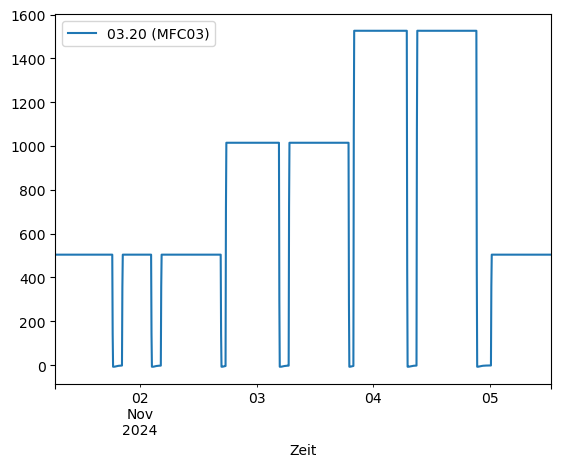

In [37]:
df_resampled[['03.20 (MFC03)']].plot()

Als nächstes wollen wir nun den im Produktgases gemessenen Ammoniakgehalt im Verlauf der Messung auftragen. Da diese Grafik später in einer Präsentation landen soll, sollten wir auf korrekte Beschriftungen Acht geben. 

Hierfür fügen wir `plot()` noch einige Argumente hinzu
- `title`: Der Titel des Diagramms
- `ylabel`: Die Beschriftung der y-Achse
- `ylim`: Das obere und untere Limit der y-Achse


<Axes: title={'center': 'Verlauf des Ammoniakgehalts im Produktgas'}, xlabel='Zeit', ylabel='NH3-Anteil [mol-%]'>

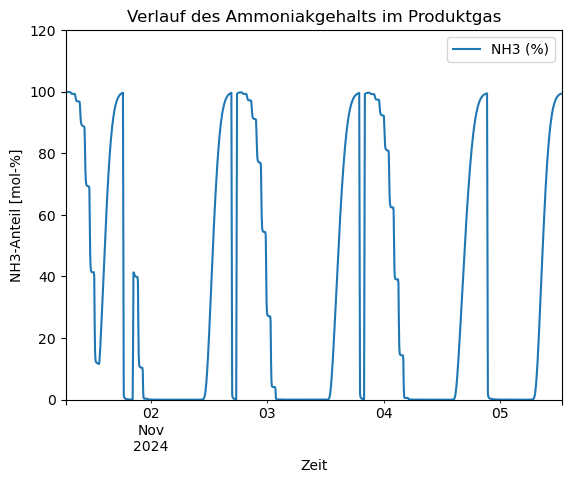

In [39]:
df_resampled[['NH3 (%)']].plot(title='Verlauf des Ammoniakgehalts im Produktgas', ylabel='NH3-Anteil [mol-%]', ylim=(0,120))

_Man kann auch mehrere Linien in einem Diagramm plotten, indem man statt nur eines Spaltennamens mehrere Namen angibt_

<Axes: xlabel='Zeit', ylabel='Temepratur [°C] / Volumenstrom [ml/min]'>

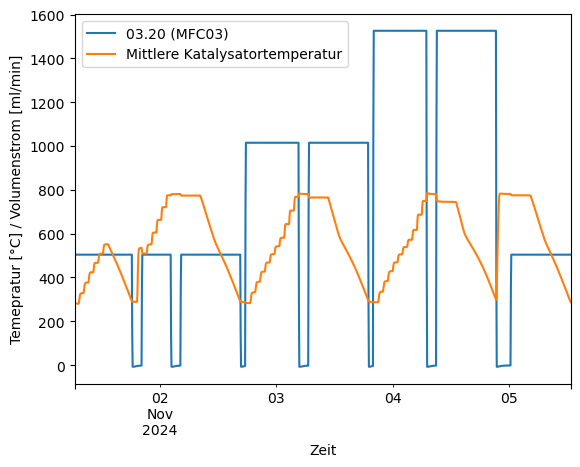

In [41]:
df_resampled[['03.20 (MFC03)', 'Mittlere Katalysatortemperatur']].plot(ylabel='Temepratur [°C] / Volumenstrom [ml/min]')

_Auch das erstellen von Subplots untereinander ist sehr einfach über das_ `subplots` _Argument von_ `dataframe.plot()` _möglich_

array([<Axes: xlabel='Zeit'>, <Axes: xlabel='Zeit'>], dtype=object)

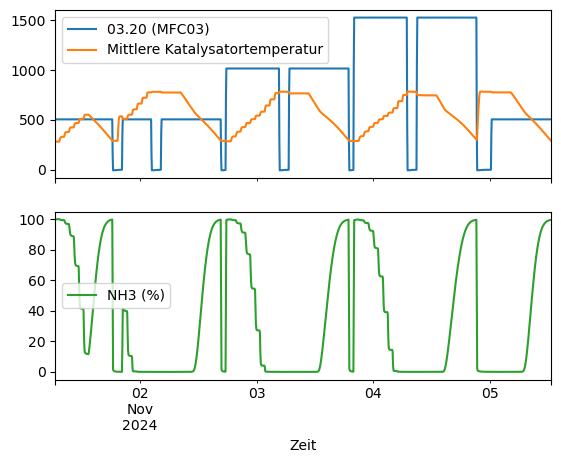

In [43]:
df_resampled[['03.20 (MFC03)', 'Mittlere Katalysatortemperatur', 'NH3 (%)']].plot(subplots=[('03.20 (MFC03)', 'Mittlere Katalysatortemperatur')])

_Mit ein bischen komplexerem Code und der direkten Nutzung von `matplotlib` lassen sich diese Diagramme auch zu einem Diagramm mit zwei y-Achsen zusammenführen_

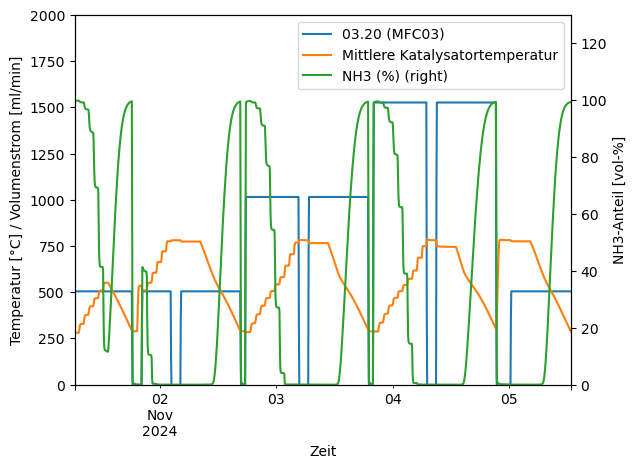

In [45]:
import matplotlib.pyplot as plt

ax = df_resampled[['03.20 (MFC03)', 'Mittlere Katalysatortemperatur']].plot(ylabel = 'Temperatur [°C] / Volumenstrom [ml/min]', ylim=(0,2000))
df_resampled[['NH3 (%)']].plot(ax=ax,secondary_y = True, ylabel = 'NH3-Anteil [vol-%]', ylim=(0,130))
plt.show()

Dies kann man jetzt noch beliebig lange fortsetzen. Der Kreativität sind bei der Datendarstellung nahezu keine Grenzen gesetzt.  
Generell sind hier noch einige hilfreiche Bibliotheken zu erwähnen: 
- `seaborne`: Hiermit lassen sich schnell schöne (visuell ansprechende) Plots erstellen, allerdings ist die mögliche Komplexität der Plots begrenzt. 
- `plotly`: Hiermit lassen sich gut interaktive Plots erstellen, in denen man herumscrollen und Datenreiehn zueinander verscheiben kann, allerdings ist auch hier der Funktionsumfang auf gängige Plottypen begrenzt
- `matplotlib`: Das ist älteste Plotting Bibliothek in Python. Sie kann nahezu Alles, was andere Bibliotheken können, aber bis ein Plot nicht nur nützlich sondern auch schön ist, können einige Zeilen Code vergehen